In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../utils")
import toolbox_ML as tb
import seaborn as sns

In [47]:
df=pd.read_csv('../data_sample/ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [48]:
# rename dataset columns
df.rename(columns = {'Product ID':'Product_ID',
                    'Air temperature [K]':'Air_temperature',
                     'Process temperature [K]':'Process_temperature',
                     'Rotational speed [rpm]':'Rotational_speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool_wear'},
          inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product_ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air_temperature      10000 non-null  float64
 4   Process_temperature  10000 non-null  float64
 5   Rotational_speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool_wear            10000 non-null  int64  
 8   Machine failure      10000 non-null  int64  
 9   TWF                  10000 non-null  int64  
 10  HDF                  10000 non-null  int64  
 11  PWF                  10000 non-null  int64  
 12  OSF                  10000 non-null  int64  
 13  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ MB


In [42]:
tb.describe_df(df).T

,DATE_TYPE,MISSINGS(%),UNIQUE_VALUES,CARDIN(%)
COL_N,,,,
UDI,int64,0.0,10000,100.0
Product_ID,object,0.0,10000,100.0
Type,object,0.0,3,0.03
Air_temperature,float64,0.0,93,0.93
Process_temperature,float64,0.0,82,0.82
Rotational_speed,int64,0.0,941,9.41
Torque,float64,0.0,577,5.77
Tool_wear,int64,0.0,246,2.46
Machine failure,int64,0.0,2,0.02


In [28]:
tb.tipifica_variables(df)

,nombre_variable,dtype,tipo_sugerido
0,UDI,int64,Numerica continua
1,Product_ID,object,Numerica continua
2,Type,object,Categorica
3,Air_temperature,float64,Numerica discreta
4,Process_temperature,float64,Numerica discreta
5,Rotational_speed,int64,Numerica discreta
6,Torque,float64,Numerica discreta
7,Tool_wear,int64,Numerica discreta
8,Machine failure,int64,Binaria
9,TWF,int64,Binaria


Exploración de Datos (EDA)

Ver distribución de las variables y correlaciones.
Identificar valores atípicos y datos faltantes (si los hubiera).
Analizar la distribución de la variable Target.
Preprocesamiento

Normalización o estandarización de variables numéricas si es necesario.
Codificación de variables categóricas (Type, Failure Type).
Balanceo de clases si Target está desbalanceado.
Construcción del Modelo

Probar modelos como RandomForestClassifier, XGBoost, SVM o redes neuronales.
Uso de validación cruzada y GridSearch para hiperparámetros.
Evaluación

Métricas como precisión, recall, F1-score y matriz de confusión.
Importancia de variables en modelos como Random Forest o SHAP values.
Presentación del Proyecto

Explicación del problema y contexto.
Principales hallazgos del EDA.
Comparación de modelos y resultados.
Conclusión y posibles mejoras.
¿Tienes alguna parte ya desarrollada o necesitas ayuda con algún paso en particular?

El conjunto de datos consta de 10 000 puntos de datos almacenados como filas con 14 características en columnas UID: identificador único que va de 1 a 10 000 ID de producto: consta de una letra L, M o H para baja (50% de todos los productos), media (30%) y alta (20%) como variantes de calidad del producto y un número de serie específico de la variante temperatura del aire [K]: generada mediante un proceso de recorrido aleatorio normalizado posteriormente a una desviación estándar de 2 K alrededor de 300 K temperatura del proceso [K]: generada mediante un proceso de recorrido aleatorio normalizado a una desviación estándar de 1 K, sumada a la temperatura del aire más 10 K. velocidad de rotación [rpm]: calculada a partir de una potencia de 2860 W, superpuesta con un ruido distribuido normalmente par [Nm]: los valores de par se distribuyen normalmente alrededor de 40 Nm con un Ïƒ = 10 Nm y sin valores negativos. desgaste de la herramienta [min]: Las variantes de calidad H/M/L añaden 5/3/2 minutos de desgaste de la herramienta a la herramienta usada en el proceso. y una etiqueta de 'falla de la máquina' que indica si la máquina ha fallado en este punto de datos en particular para cualquiera de los siguientes modos de falla. La falla de la máquina consta de cinco modos de falla independientes falla por desgaste de la herramienta (TWF): la herramienta se reemplazará o fallará en un tiempo de desgaste de la herramienta seleccionado aleatoriamente entre 200 y 240 minutos (120 veces en nuestro conjunto de datos). En este punto del tiempo, la herramienta se reemplaza 69 veces y falla 51 veces (asignadas aleatoriamente). falla por disipación de calor (HDF): la disipación de calor causa una falla del proceso, si la diferencia entre la temperatura del aire y del proceso es inferior a 8,6 K y la velocidad de rotación de la herramienta es inferior a 1380 rpm. Este es el caso de 115 puntos de datos. fallo de potencia (PWF): el producto del par y la velocidad de rotación (en rad/s) es igual a la potencia requerida para el proceso. Si esta potencia es inferior a 3500 W o superior a 9000 W, el proceso falla, lo que ocurre 95 veces en nuestro conjunto de datos. fallo por sobreesfuerzo (OSF): si el producto del desgaste de la herramienta y el par supera los 11 000 minNm para la variante de producto L (12 000 M, 13 000 H), el proceso falla debido a un sobreesfuerzo. Esto es cierto para 98 puntos de datos. fallos aleatorios (RNF): cada proceso tiene una probabilidad del 0,1 % de fallar independientemente de sus parámetros de proceso. Este es el caso de solo 5 puntos de datos, menos de lo que podría esperarse para 10 000 puntos de datos en nuestro conjunto de datos. Si al menos uno de los modos de falla anteriores es verdadero, el proceso falla y la etiqueta de "falla de la máquina" se establece en 1. Por lo tanto, no es transparente para el método de aprendizaje automático cuál de los modos de falla ha provocado que el proceso falle.

| Variable                    | Tipo de dato                 | Tipo de variable         | Descripción                                                                                             | Importancia en el modelo                                                 |
|-----------------------------|------------------------------|--------------------------|---------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------|
| UID                         | Entero                       | Variable categórica      | Identificador único que varía de 1 a 10000.                                                            | Permite identificar de manera única cada registro en el conjunto de datos. |
| product ID                  | String                       | Variable categórica      | Compuesto por una letra (L, M o H) y un número de serie específico del variante.                       | Indica la calidad del producto, lo que puede afectar el rendimiento del modelo. |
| type                        | String                       | Variable categórica      | Tipo de producto que corresponde a las categorías L, M o H.                                            | Relacionado con el ID del producto, influyendo en la predicción del modelo. |
| air temperature [K]        | Flotante                     | Variable continua        | Generada usando un proceso de caminata aleatoria normalizada con una desviación estándar de 2 K alrededor de 300 K. | Afecta los parámetros del proceso, crucial para la identificación de fallos. |
| process temperature [K]    | Flotante                     | Variable continua        | Temperatura del proceso, generada con un proceso de caminata aleatoria y normalizada, sumando 10 K a la temperatura del aire. | Fundamental para determinar condiciones de operación del proceso.         |
| rotational speed [rpm]     | Flotante                     | Variable continua        | Calculada a partir de una potencia de 2860 W, con ruido distribuido normalmente.                        | Afecta el rendimiento y puede estar relacionado con fallos de la máquina. |
| torque [Nm]                | Flotante                     | Variable continua        | Valores de par distribuidos normalmente alrededor de 40 Nm, con una desviación estándar de 10 Nm.      | Influye en la potencia requerida y en el análisis de fallos.             |
| tool wear [min]            | Flotante                     | Variable continua        | Variante de calidad H/M/L añade 5/3/2 minutos de desgaste a la herramienta usada en el proceso.       | Importante para predecir fallos relacionados con el desgaste de herramientas. |
| machine failure             | Binario (0/1)                | Variable categórica      | Indica si la máquina ha fallado (1) o no (0) en un punto de datos particular.                          | Crítico para evaluar la fiabilidad del proceso y entrenar modelos predictivos. |
| tool wear failure (TWF)     | Binario (0/1)                | Variable categórica      | Indica si el desgaste de la herramienta causó un fallo; fallos y reemplazos se asignan aleatoriamente. | Ayuda a entender fallos en el proceso y la durabilidad de las herramientas. |
| heat dissipation failure (HDF)| Binario (0/1)               | Variable categórica      | Indica un fallo por disipación de calor bajo condiciones específicas de temperatura y velocidad.       | Essential para identificar riesgos de operación y optimizar procesos.   |
| power failure (PWF)        | Binario (0/1)                | Variable categórica      | Indica fallos si la potencia requerida está fuera del rango de operación.                               | Clave para asegurar la energía y funcionalidad de los procesos.         |
| overstrain failure (OSF)   | Binario (0/1)                | Variable categórica      | Indica fallos por sobrecarga si el producto de desgaste y par excede límites específicos para cada variante. | Crítico para prevenir fallos mecánicos y aumento en el desgaste.       |
| random failures (RNF)      | Binario (0/1)                | Variable categórica      | Indica fallos aleatorios en el proceso, independiebtenebt de los parametros

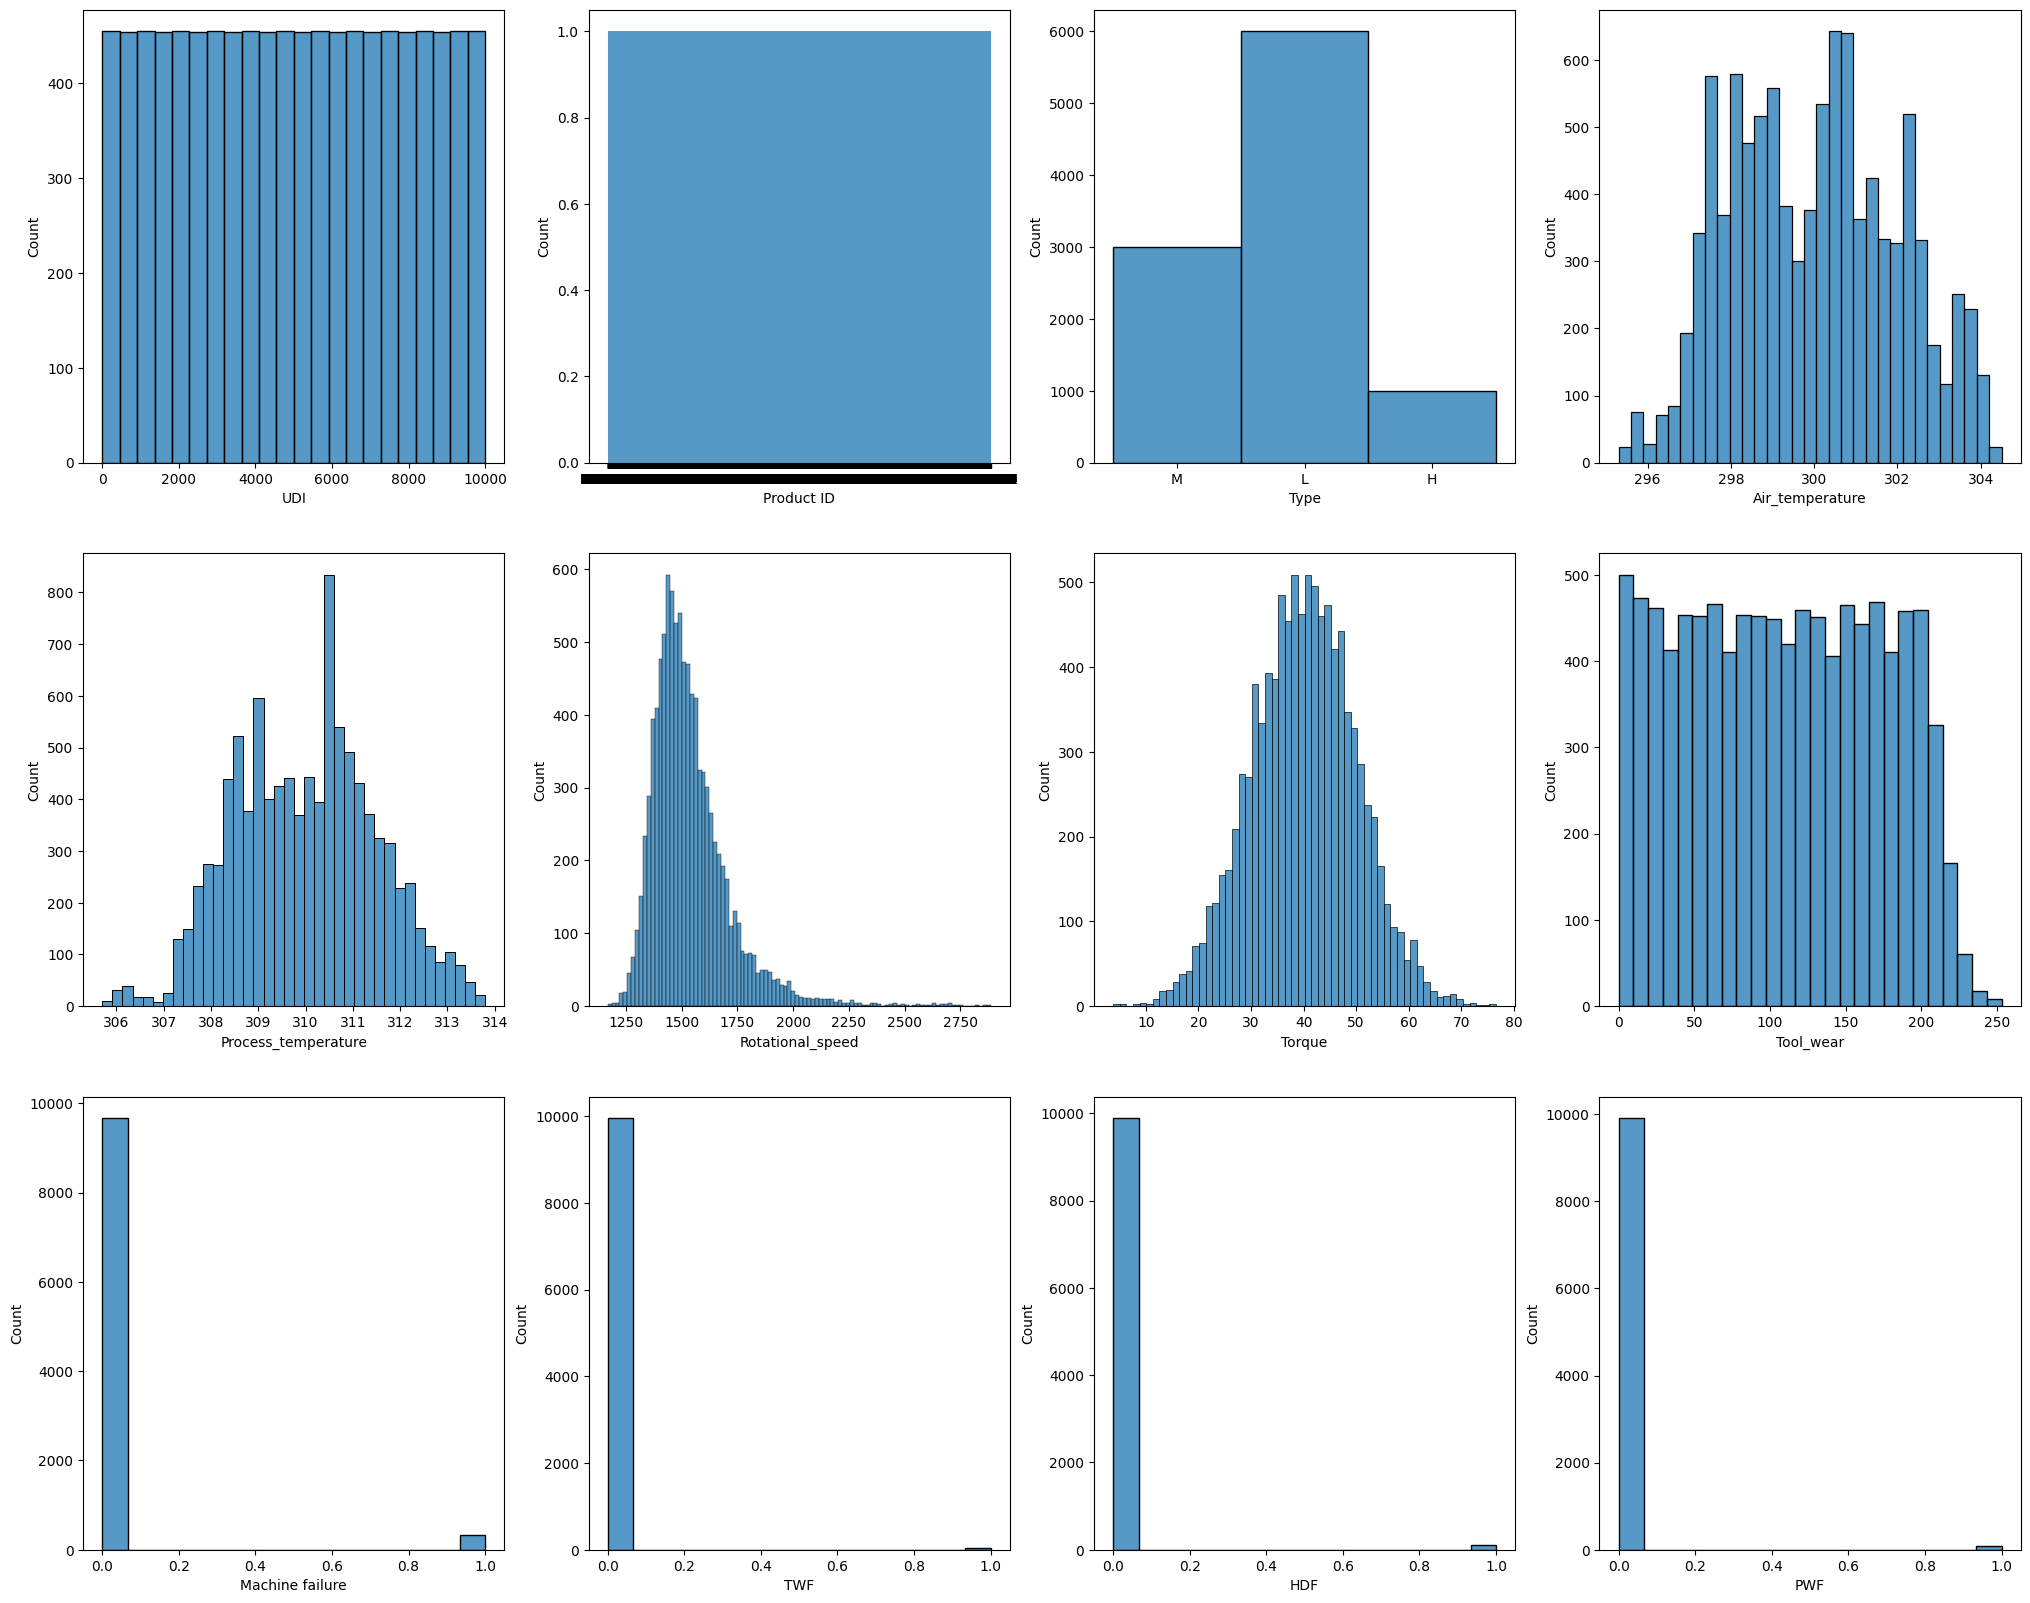

In [20]:
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns[:12]):  # Limit to the first 12 columns
    sns.histplot(df[col], ax=ax[i//4][i%4])

Text(0.5, 1.0, 'Number of failure types per record')

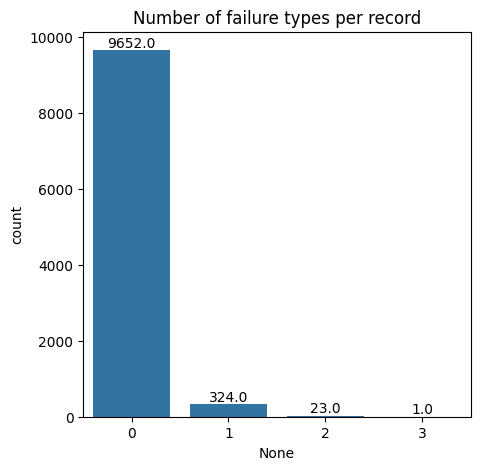

In [29]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

In [44]:
df.head()

COL_N,UDI,Product_ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [49]:
X = df.drop(columns=['Machine failure', 'TWF', 
                     'HDF', 'PWF', 'OSF', 
                     'RNF'])
y = df['Machine failure']

In [51]:
X.head()

,UDI,Product_ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear
0,1,M14860,M,298.1,308.6,1551,42.8,0
1,2,L47181,L,298.2,308.7,1408,46.3,3
2,3,L47182,L,298.1,308.5,1498,49.4,5
3,4,L47183,L,298.2,308.6,1433,39.5,7
4,5,L47184,L,298.2,308.7,1408,40.0,9


In [ ]:
df.drop(columns=["UDI", "Product_ID"], inplace=True)